# Impotrs

In [14]:
import sys
import os
import pandas as pd 
import numpy as np
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression


import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from data_collection.data_collector import DataCollector, mt5
from future_inzenering.talib_indicators import TLIndicators
from future_inzenering.basic_future_inz import BasicFuture



# Getting Data

In [93]:
data_col = DataCollector()
data = data_col.get_historical_data(symbol="EURUSD", timeframe= mt5.TIMEFRAME_M5 )
data.head() 

,Open,Close,High,Low,Volume
Date,,,,,
2024-03-11 04:35:00,1.09388,1.09390,1.09394,1.09383,185
2024-03-11 04:40:00,1.09389,1.09392,1.09407,1.09388,178
2024-03-11 04:45:00,1.09392,1.09396,1.09401,1.09389,157
2024-03-11 04:50:00,1.09394,1.09381,1.09396,1.09381,165
2024-03-11 04:55:00,1.09379,1.09386,1.09397,1.09378,192


# Added Indicators

In [94]:
bf = BasicFuture()
data = bf.create_lag_features(data, column="Open", end=1)
data = bf.create_lag_features(data, column="High", end=1)
data = bf.create_lag_features(data, column="Low", end=1)
data = bf.create_lag_features(data, column="Volume", end=1)
data = bf.create_lag_features(data, column="Close")


data = bf.double_exponential_smoothing(data)
data = bf.exponential_smoothing(data)
data = bf.triple_exponential_smoothing(data)
data = bf.confidence_interval(data, column="FLClose")


data.head()


,Open,Close,High,Low,Volume,FLOpen,FLHigh,FLLow,FLVolume,FLClose,...,ES,Forecast,Predicted_Deviation,Upper_Bound,Lower_Bound,Smooth,Trend,Season,Conf_upper_interval,Conf_lower_interval
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-11 14:00:00,1.09429,1.09427,1.09431,1.09411,494,1.09424,1.09433,1.09416,197.0,1.09429,...,1.094284,1.094308,0.000019,1.094346,1.094270,1.094136,0.000021,0.000151,1.094710,1.093870
2024-03-11 14:05:00,1.09426,1.09415,1.09434,1.09411,591,1.09429,1.09431,1.09411,494.0,1.09427,...,1.094271,1.094288,0.000018,1.094323,1.094253,1.094160,0.000021,0.000106,1.094608,1.093932
2024-03-11 14:10:00,1.09415,1.09403,1.09415,1.09400,497,1.09426,1.09434,1.09411,591.0,1.09415,...,1.094162,1.094167,0.000018,1.094202,1.094133,1.094186,0.000021,-0.000040,1.094446,1.093854
2024-03-11 14:15:00,1.09403,1.09407,1.09414,1.09393,531,1.09415,1.09415,1.09400,497.0,1.09403,...,1.094043,1.094057,0.000026,1.094108,1.094006,1.094200,0.000021,-0.000164,1.094291,1.093769
2024-03-11 14:20:00,1.09408,1.09403,1.09420,1.09388,596,1.09403,1.09414,1.09393,531.0,1.09407,...,1.094067,1.094100,0.000030,1.094159,1.094042,1.094209,0.000020,-0.000128,1.094325,1.093815


In [95]:

tl = TLIndicators(data=data, Close="FLClose", High="FLHigh" , Low="FLLow", 
                  Open="FLOpen", Volume="FLVolume")

data = tl.all_talib_indicators()

data.head()


,Open,Close,High,Low,Volume,FLOpen,FLHigh,FLLow,FLVolume,FLClose,...,VAR220,median23,mode23,std23,median115,mode115,std115,median220,mode220,std220
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-11 14:00:00,1.09429,1.09427,1.09431,1.09411,494,1.09424,1.09433,1.09416,197.0,1.09429,...,0.0,1.09429,1.09429,0.000000,1.09429,1.09429,0.000000,1.09429,1.09429,0.000000
2024-03-11 14:05:00,1.09426,1.09415,1.09434,1.09411,591,1.09429,1.09431,1.09411,494.0,1.09427,...,0.0,1.09428,1.09427,0.000007,1.09428,1.09427,0.000007,1.09428,1.09427,0.000007
2024-03-11 14:10:00,1.09415,1.09403,1.09415,1.09400,497,1.09426,1.09434,1.09411,591.0,1.09415,...,0.0,1.09427,1.09415,0.000010,1.09427,1.09415,0.000010,1.09427,1.09415,0.000010
2024-03-11 14:15:00,1.09403,1.09407,1.09414,1.09393,531,1.09415,1.09415,1.09400,497.0,1.09403,...,0.0,1.09421,1.09403,0.000036,1.09421,1.09403,0.000036,1.09421,1.09403,0.000036
2024-03-11 14:20:00,1.09408,1.09403,1.09420,1.09388,596,1.09403,1.09414,1.09393,531.0,1.09407,...,0.0,1.09415,1.09403,0.000059,1.09415,1.09403,0.000059,1.09415,1.09403,0.000059


# Select indicators 

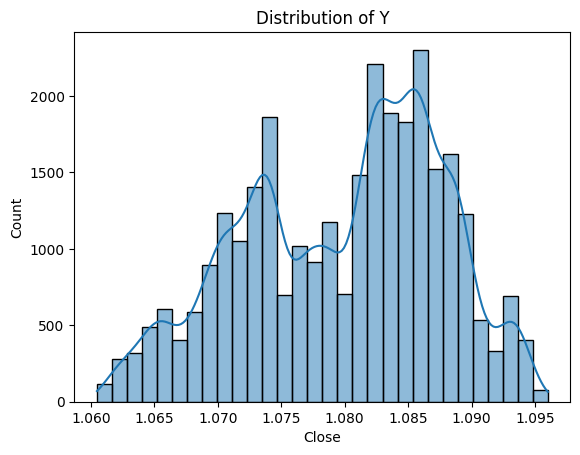

In [18]:
sns.histplot(data["Close"], kde=True, bins=30)
plt.title('Distribution of Y');

In [19]:
data.shape

(29887, 326)

##### Kolumny o zerowej wariancji zawierają wartości stałe, tj. wszystkie elementy w tych kolumnach są takie same. Identyfikacja takich kolumn jest przydatna, ponieważ nie dostarczają one żadnych informacji do modeli uczenia maszynowego i można je usunąć.

In [20]:
def drop_zero_variance(data: pd.DataFrame, threshold: float = 0.0) -> pd.DataFrame:
    """
    Removes columns with variance below a certain threshold.

    Parameters:
    -----------
    data : pd.DataFrame
    Input DataFrame.

    threshold : float, default 0.0
    Variance threshold. Columns with variance below this value will be removed.

    Returns:
    -----------
    pd.DataFrame
    DataFrame without columns with variance below the specified threshold.
    """

    # Calculate variance for each column
    variance = data.var()

    # Select columns with variance above the threshold
    variance_above_threshold = variance[variance > threshold].index.tolist()

    # Return DataFrame only with the required columns
    return data[variance_above_threshold]


data = drop_zero_variance(data)


##### Korelacja między cechami a zmienną docelową

Współczynnik korelacji rang Spearmana: ocenia stopień monotonicznej zależności między dwiema zmiennymi. Zależność monotoniczna oznacza, że ​​gdy jedna zmienna rośnie, druga zmienna albo zawsze rośnie, albo zawsze maleje, ale niekoniecznie w sposób liniowy.

Wartość p: pomaga ocenić istotność statystyczną korelacji. Wartość ta wskazuje prawdopodobieństwo, że zaobserwowana korelacja wystąpiła przypadkowo. Jeśli wartość p jest mniejsza niż wybrany próg (na przykład 0,05), wówczas korelację uznaje się za istotną statystycznie.

In [25]:
def filter_features_by_spearman_corr(data: pd.DataFrame, target: str = "Close",
                                    p_value_threshold: float = .05,
                                    corr_threshold: float = .05) -> pd.DataFrame:
    """
    Function to filter features by Spearman correlation with the target variable.

    Spearman's rank correlation coefficient: Measures the degree of monotonic relationship between 
    two variables. Monotonic relationship means that as one variable increases, the other variable 
    either always increases or always decreases, but not necessarily in a linear fashion.

    p-value: Helps to assess the statistical significance of the correlation. 
    This value indicates the probability that the observed correlation occurred by chance. 
    If the p-value is less than a chosen threshold (e.g. 0.05), then the correlation is 
    considered statistically significant.

    Parameters:
    - data: pd.DataFrame - source data with features and target variable.
    - target: str - name of the target variable in the dataframe (default is "Close").
    - p_value_threshold: float - threshold for the p-value of the correlation (default is 0.05).
    - corr_threshold: float - threshold for the absolute value of the correlation (default is 0.05).

    Returns:
    - pd.DataFrame - subset source data consisting of features that have a statistically significant Spearman correlation with the target variable.
    """

    if target not in data.columns:
        raise ValueError(f"Target variable '{target}' not found in the data.")

    
    Y = data[target]
    data = data.drop(columns=target)

    correlation_df = {}

    # Calculate the Spearman correlation for each feature
    for column in data.columns:
        if data[column].isnull().any() or Y.isnull().any():
            correlation_df[column] = {"corr": None, "p_value": None}
            continue

        corr, p_value = spearmanr(data[column], Y)
        correlation_df[column] = {"corr": corr, "p_value": p_value}

    correlation_df = pd.DataFrame(correlation_df).T

    # Filter by correlation values ​​and p-values
    filtered_df = correlation_df[(correlation_df['corr'].abs() > corr_threshold) &
    (correlation_df['p_value'] < p_value_threshold)]

    filtered_data = data[filtered_df.index]
    filtered_data = filtered_data.join(Y)

    return filtered_data


data = filter_features_by_spearman_corr(data)


##### Korelacja między cechami

In [50]:
def filter_correlated_features(data: pd.DataFrame, corr_threshold: float = 0.8) -> pd.DataFrame:
    """
    A function for filtering features based on the Pearson correlation between them.

    Parameters:
    - data: pd.DataFrame - source data with features.
    - corr_threshold: float - correlation threshold above which features will be excluded.

    Returns:
    - pd.DataFrame - a subset of the source data with filtered features.
    """
    
    corr_matrix = data.corr(method='pearson')
    
    np.fill_diagonal(corr_matrix.values, 0)
    
    # Identifying highly correlated feature pairs
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > corr_threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)
    
    # Removing highly correlated features
    filtered_data = data.drop(columns=to_drop)
    
    return filtered_data


# Отбор столбцов, которые НЕ содержат "lag" или "FL"
filtered_columns = [col for col in data.columns if "lag" not in col and "FL" not in col and "Close" not in col]

filtered_data = filter_correlated_features(data[filtered_columns])

data = pd.concat([filtered_data, data[[col for col in data.columns if col not in filtered_columns]]], axis=1)


##### Selekcja opóźnienia

In [57]:
def select_features_by_mutual_info(data: pd.DataFrame, target: str = "Close", mi_threshold: float = 0.1) -> pd.DataFrame:
    """
    A function for selecting lag features based on their mutual information with the target variable.

    Parameters:
    - data: pd.DataFrame - source data containing lag features and the target variable.
    - target: str - name of the target variable in the dataframe.
    - mi_threshold: float - mutual information threshold for lag selection.

    Returns:
    - pd.DataFrame - dataframe containing only the selected lag features.
    """
    
    # Разделяем признаки и целевую переменную
    X = data.drop(columns=[target])
    target = data[target]
    
    # Вычисляем взаимную информацию для каждого признака
    mi = mutual_info_regression(X, target)
    
    # Создаем словарь с именами признаков и их взаимной информацией
    mi_series = pd.Series(mi, index=X.columns)
    
    # Фильтруем признаки по порогу взаимной информации
    selected_lags = mi_series[mi_series >= mi_threshold].index.tolist()
    
    # Возвращаем датафрейм с отобранными лагами
    return data[selected_lags]


select_features_by_mutual_info(data)


,Open,Trend,DEMA23,EMA23,T323,DEMA115,T3115,T3220,MAXINDEX23,DIV,...,lag_77,lag_78,lag_79,lag_80,lag_81,lag_82,lag_83,lag_84,lag_85,lag_86
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-11 14:00:00,1.09429,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000155,...,1.09416,1.09409,1.09406,1.09407,1.09405,1.09401,1.09395,1.09400,1.09384,1.09370
2024-03-11 14:05:00,1.09426,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000183,...,1.09415,1.09416,1.09409,1.09406,1.09407,1.09405,1.09401,1.09395,1.09400,1.09384
2024-03-11 14:10:00,1.09415,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000210,...,1.09395,1.09415,1.09416,1.09409,1.09406,1.09407,1.09405,1.09401,1.09395,1.09400
2024-03-11 14:15:00,1.09403,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000137,...,1.09401,1.09395,1.09415,1.09416,1.09409,1.09406,1.09407,1.09405,1.09401,1.09395
2024-03-11 14:20:00,1.09408,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000192,...,1.09411,1.09401,1.09395,1.09415,1.09416,1.09409,1.09406,1.09407,1.09405,1.09401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02 23:35:00,1.09091,-0.000010,1.091155,1.091183,1.091132,1.092646,1.082807,1.080899,29869,1.000174,...,1.09089,1.09057,1.09074,1.09053,1.09012,1.09007,1.08915,1.08877,1.08906,1.08944
2024-08-02 23:40:00,1.09094,-0.000010,1.091119,1.091162,1.091138,1.092646,1.082860,1.080914,29869,1.000073,...,1.09121,1.09089,1.09057,1.09074,1.09053,1.09012,1.09007,1.08915,1.08877,1.08906
2024-08-02 23:45:00,1.09108,-0.000009,1.091111,1.091156,1.091144,1.092650,1.082914,1.080930,29869,1.000193,...,1.09120,1.09121,1.09089,1.09057,1.09074,1.09053,1.09012,1.09007,1.08915,1.08877


# Collecting all methods into one class

In [114]:
class BasicFeatureSelector:
    """
    Class for feature selection based on various methods:
    - Removal of features with low variance
    - Feature selection based on Spearman correlation with the target variable
    - Feature selection based on Pearson correlation between them
    - Feature selection based on mutual information with the target variable
    """

    def remove_features_low_variance(self, data: pd.DataFrame, threshold: float = 0.0) -> list:
        """
        Removes columns with variance below a certain threshold.

        Parameters:
        -----------
        data : pd.DataFrame
        Input DataFrame.

        threshold : float, default 0.0
        Variance threshold. Columns with variance below this value will be removed.

        Returns:
        -----------
        - list - a list of feature names that have low correlation with other features.
        """

        # Calculate variance for each column
        variance = data.var()

        # Select columns with variance above the threshold
        variance_above_threshold = variance[variance > threshold].index.tolist()

        # Return DataFrame only with the required columns
        return variance_above_threshold

    def filter_features_by_spearman_corr(self, data: pd.DataFrame, target: str = "Close",
                                        p_value_threshold: float = .05,
                                        corr_threshold: float = .1) -> list:
        """
        Function to filter features by Spearman correlation with the target variable.

        Spearman's rank correlation coefficient: Measures the degree of monotonic relationship between 
        two variables. Monotonic relationship means that as one variable increases, the other variable 
        either always increases or always decreases, but not necessarily in a linear fashion.

        p-value: Helps to assess the statistical significance of the correlation. 
        This value indicates the probability that the observed correlation occurred by chance. 
        If the p-value is less than a chosen threshold (e.g. 0.05), then the correlation is 
        considered statistically significant.

        Parameters:
        - data: pd.DataFrame - source data with features and target variable.
        - target: str - name of the target variable in the dataframe (default is "Close").
        - p_value_threshold: float - threshold for the p-value of the correlation (default is 0.05).
        - corr_threshold: float - threshold for the absolute value of the correlation (default is 0.05).

        Returns:
        - list - a list of feature names that have low correlation with other features.
        """

        if target not in data.columns:
            raise ValueError(f"Target variable '{target}' not found in the data.")

        
        Y = data[target]
        data = data.drop(columns=target)

        correlation_df = {}

        # Calculate the Spearman correlation for each feature
        for column in data.columns:
            if data[column].isnull().any() or Y.isnull().any():
                correlation_df[column] = {"corr": None, "p_value": None}
                continue

            corr, p_value = spearmanr(data[column], Y)
            correlation_df[column] = {"corr": corr, "p_value": p_value}

        correlation_df = pd.DataFrame(correlation_df).T

        # Filter by correlation values ​​and p-values
        filtered_df = correlation_df[(correlation_df['corr'].abs() > corr_threshold) &
        (correlation_df['p_value'] < p_value_threshold)]

        filtered_data = data[filtered_df.index]
        filtered_data = filtered_data.join(Y)

        return filtered_df.index.tolist() + [target]

    def filter_correlated_features(self, data: pd.DataFrame, corr_threshold: float = 0.8) -> list:
        """
        A function for filtering features based on the Pearson correlation between them.
        Returns a list of features that have low correlation with others.

        Parameters:
        - data: pd.DataFrame - source data with features.
        - corr_threshold: float - correlation threshold above which features will be excluded.

        Returns:
        - list - a list of feature names that have low correlation with other features.
        """
        
        # Compute the Pearson correlation matrix
        corr_matrix = data.corr(method='pearson')
        
        # Set the diagonal to zero (self-correlation)
        np.fill_diagonal(corr_matrix.values, 0)
        
        # Identifying highly correlated feature pairs
        high_corr_features = set()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > corr_threshold:
                    colname = corr_matrix.columns[i]
                    high_corr_features.add(colname)
        
        all_features = set(data.columns)
        low_corr_features = all_features - high_corr_features
        
        return list(low_corr_features)

    def select_features_by_mutual_info(self, data: pd.DataFrame, target: str = "Close", mi_threshold: float = 0.1) -> list:
        """
        A function for selecting lag features based on their mutual information with the target variable.

        Parameters:
        - data: pd.DataFrame - source data containing lag features and the target variable.
        - target: str - name of the target variable in the dataframe.
        - mi_threshold: float - mutual information threshold for lag selection.

        Returns:
        - list - a list of feature names that have low correlation with other features.
        """
        
        X = data.drop(columns=[target])
        target = data[target]
        
        mi = mutual_info_regression(X, target)
        
        # Создаем словарь с именами признаков и их взаимной информацией
        mi_series = pd.Series(mi, index=X.columns)
        
        # Фильтруем признаки по порогу взаимной информации
        selected_features = mi_series[mi_series >= mi_threshold].index.tolist()
        
        # Возвращаем датафрейм с отобранными лагами
        return selected_features



In [115]:
bfs = BasicFeatureSelector()


target = "Close"

feture = bfs.remove_features_low_variance(data)
feture = bfs.filter_features_by_spearman_corr(data[feture], target=target)
feture = bfs.select_features_by_mutual_info(data[feture], target=target)

data = data[feture]
columns = [col for col in data.columns if "lag" not in col and "FL" not in col and "Close" not in col]
lag_col = [col for col in data.columns if "lag" in col.lower() or "FL" in col]

feture = bfs.filter_correlated_features(data[columns])
feture = feture + lag_col
feture


['DEMA115',
 'T323',
 'PLUS_DM115',
 'STDDEV23',
 'Open',
 'DIV',
 'CMO115',
 'AROONOSC220',
 'MINUS_DM115',
 'PLUS_DM23',
 'STDDEV220',
 'TRIX115',
 'std220',
 'EMA23',
 'STDDEV115',
 'T3220',
 'MFI220',
 'ADX220',
 'WILLR115',
 'MINUS_DM23',
 'DEMA23',
 'AROONOSC115',
 'TRIX220',
 'T3115',
 'MINUS_DI115',
 'FLOpen',
 'FLHigh',
 'FLLow',
 'FLClose',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10',
 'lag_11',
 'lag_12',
 'lag_13',
 'lag_14',
 'lag_15',
 'lag_16',
 'lag_17',
 'lag_18',
 'lag_19',
 'lag_20',
 'lag_21',
 'lag_22',
 'lag_23',
 'lag_24',
 'lag_25',
 'lag_26',
 'lag_27',
 'lag_28',
 'lag_29',
 'lag_30',
 'lag_31',
 'lag_32',
 'lag_33',
 'lag_34',
 'lag_35',
 'lag_36',
 'lag_37',
 'lag_38',
 'lag_39',
 'lag_40',
 'lag_41',
 'lag_42',
 'lag_43',
 'lag_44',
 'lag_45',
 'lag_46',
 'lag_47',
 'lag_48',
 'lag_49',
 'lag_50',
 'lag_51',
 'lag_52',
 'lag_53',
 'lag_54',
 'lag_55',
 'lag_56',
 'lag_57',
 'lag_58',
 'lag_59',
 'lag_60',
 'lag_